# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#daily 7 day forecast API


In [6]:
#weather_api_key


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

625

In [8]:
#print(city)

In [9]:
#print(cities_list) #print a list of the cities_list

In [10]:
# this is your api url link, we fill it in below. 
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [11]:
base_url= "http://api.openweathermap.org/data/2.5/weather?"
#city_one= "Denver"

query_url= base_url+ "appid="+weather_api_key+ "&q=" + city
print(query_url) #click on this url and put into Google.


http://api.openweathermap.org/data/2.5/weather?appid=bc6b9a82441f1910d9054de33f421ceb&q=tiksi


In [12]:
#query_url='api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
#query_url

weather_response=requests.get(query_url)
weather_json=weather_response.json()
#pprint(f'The weather API responded with: {weather_json}.')

pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 71.6872, 'lon': 128.8694},
 'dt': 1612050201,
 'id': 2015306,
 'main': {'feels_like': 234.68,
          'grnd_level': 1035,
          'humidity': 86,
          'pressure': 1041,
          'sea_level': 1041,
          'temp': 240.14,
          'temp_max': 240.14,
          'temp_min': 240.14},
 'name': 'Tiksi',
 'sys': {'country': 'RU', 'sunrise': 1612058064, 'sunset': 1612070479},
 'timezone': 32400,
 'visibility': 4432,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 68, 'speed': 2.24}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#below is the base URL to access the openweather api data. Remove all data after ? 

#base_url= "http://api.openweathermap.org/data/2.5/weather?"


# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#create empty list for your eventual dataframe
city_list_500=[]
lat_500=[]
long_500=[]
max_temp_500=[]
humidity_500=[]
wind_speed_500=[]
cloudiness_500=[]
country_500=[]
date_500=[]
counter=0
group=1



#[:3] gives me back 3 results from the cities_list. 
# for loop itreeather list of randomeng enerrate scitis, pings the opena 
for each_city in cities_list[:]: 
    #query_url= base_url+ "appid="+weather_api_key+ "&q=" + city
    query_url=f'{base_url}q={each_city}&appid={weather_api_key}'
    weather_response=requests.get(query_url)
    weather_data=weather_response.json()
    counter= counter +1
    
    #pprint(weather_data) #keep this in the for loop so that it prints out the amount you want
    try:
        city_list_500.append(weather_data['name'])
        lat_500.append(weather_data['coord']['lat'])
        #print(lat_500)
        long_500.append(weather_data['coord']['lon'])
        max_temp_500.append(weather_data['main']['temp_max'])
        humidity_500.append(weather_data['main']['humidity'])
        cloudiness_500.append(weather_data['clouds']['all'])
        wind_speed_500.append(weather_data['wind']['speed'])
        country_500.append(weather_data['sys']['country'])
        date_500.append(weather_data['dt'])
        if counter >50:
            counter=1
            group=1 +group
        #print(f" Processing record number {len(city_list_500)} for the city of {each_city}")
        print(f" Processing record number {counter} for Set {group} the city of {each_city}")
        
    except:
        print('City not found. Skipping...')
        pass

    # need to print out 50 and then new list shows up. look at starter file
    # hint: these are counters
    # 

# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(wind_speed_500)
# print(cloudiness_500)
# print(country_500)
# print(date_500)


City not found. Skipping...
 Processing record number 2 for Set 1 the city of pecos
City not found. Skipping...
 Processing record number 4 for Set 1 the city of port elizabeth
 Processing record number 5 for Set 1 the city of faanui
 Processing record number 6 for Set 1 the city of kapaa
 Processing record number 7 for Set 1 the city of rikitea
 Processing record number 8 for Set 1 the city of ilheus
 Processing record number 9 for Set 1 the city of jamestown
 Processing record number 10 for Set 1 the city of east london
 Processing record number 11 for Set 1 the city of bredasdorp
 Processing record number 12 for Set 1 the city of ushuaia
 Processing record number 13 for Set 1 the city of hermanus
 Processing record number 14 for Set 1 the city of punta arenas
 Processing record number 15 for Set 1 the city of bluff
 Processing record number 16 for Set 1 the city of albany
 Processing record number 17 for Set 1 the city of mataura
 Processing record number 18 for Set 1 the city of ya

City not found. Skipping...
 Processing record number 48 for Set 3 the city of hofn
 Processing record number 49 for Set 3 the city of piacabucu
 Processing record number 50 for Set 3 the city of caravelas
 Processing record number 1 for Set 4 the city of mayo
 Processing record number 2 for Set 4 the city of mournies
 Processing record number 3 for Set 4 the city of shu
 Processing record number 4 for Set 4 the city of asau
City not found. Skipping...
 Processing record number 6 for Set 4 the city of ostrovnoy
 Processing record number 7 for Set 4 the city of verkhnetulomskiy
City not found. Skipping...
 Processing record number 9 for Set 4 the city of egvekinot
City not found. Skipping...
 Processing record number 11 for Set 4 the city of hoshcha
City not found. Skipping...
 Processing record number 13 for Set 4 the city of mokhsogollokh
 Processing record number 14 for Set 4 the city of geraldton
 Processing record number 15 for Set 4 the city of tautira
 Processing record number 16

 Processing record number 41 for Set 6 the city of tabou
 Processing record number 42 for Set 6 the city of batagay
 Processing record number 43 for Set 6 the city of uuemoisa
 Processing record number 44 for Set 6 the city of itoman
 Processing record number 45 for Set 6 the city of nome
 Processing record number 46 for Set 6 the city of tiznit
City not found. Skipping...
 Processing record number 48 for Set 6 the city of nizhniy baskunchak
 Processing record number 49 for Set 6 the city of dali
 Processing record number 50 for Set 6 the city of ola
 Processing record number 1 for Set 7 the city of upington
 Processing record number 2 for Set 7 the city of baruun-urt
 Processing record number 3 for Set 7 the city of mogadishu
 Processing record number 4 for Set 7 the city of kampot
 Processing record number 5 for Set 7 the city of esperance
 Processing record number 6 for Set 7 the city of simpang
 Processing record number 7 for Set 7 the city of nantucket
 Processing record number 8 

 Processing record number 31 for Set 9 the city of katobu
 Processing record number 32 for Set 9 the city of ambilobe
 Processing record number 33 for Set 9 the city of lagoa
 Processing record number 34 for Set 9 the city of savannah bight
 Processing record number 35 for Set 9 the city of dvorichna
 Processing record number 36 for Set 9 the city of treinta y tres
City not found. Skipping...
 Processing record number 38 for Set 9 the city of kattivakkam
 Processing record number 39 for Set 9 the city of batesville
 Processing record number 40 for Set 9 the city of alpena
 Processing record number 41 for Set 9 the city of broome
City not found. Skipping...
 Processing record number 43 for Set 9 the city of buala
 Processing record number 44 for Set 9 the city of santa cruz
 Processing record number 45 for Set 9 the city of lockhart
 Processing record number 46 for Set 9 the city of bima
 Processing record number 47 for Set 9 the city of lesosibirsk
 Processing record number 48 for Set 

 Processing record number 20 for Set 12 the city of dauphin
 Processing record number 21 for Set 12 the city of kaili
 Processing record number 22 for Set 12 the city of kumluca
 Processing record number 23 for Set 12 the city of souillac
 Processing record number 24 for Set 12 the city of karoi
 Processing record number 25 for Set 12 the city of bosaso
 Processing record number 26 for Set 12 the city of soledade
 Processing record number 27 for Set 12 the city of lumsden
City not found. Skipping...
 Processing record number 29 for Set 12 the city of ishim
 Processing record number 30 for Set 12 the city of juegang
 Processing record number 31 for Set 12 the city of alice springs
 Processing record number 32 for Set 12 the city of tabuk
 Processing record number 33 for Set 12 the city of agnibilekrou
 Processing record number 34 for Set 12 the city of araria
 Processing record number 35 for Set 12 the city of rio do sul
 Processing record number 36 for Set 12 the city of samana
 Proces

In [16]:
len(city_list_500)

579

In [17]:
# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(wind_speed_500)
# print(cloudiness_500)
# print(country_500)
# print(date_500)

# # highlight them all and hit command ? to comment these
# #

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#create a dictionary and then pass to data frame 

# how can we run the API calls so that the output is equal to 500.

# is there a way to set = to 500?

weather_data_dict= {'City': city_list_500,
                       'Latitude': lat_500,
                       'Longitude': long_500,
                       'Max Temp': max_temp_500,
                       'Humidity': humidity_500,
                       'Cloudiness': cloudiness_500,
                       'Wind Speed': wind_speed_500,
                       'Country' : country_500,
                       'Date': date_500
                      }
weather_data_df_zero=pd.DataFrame(weather_data_dict)
weather_data_df_zero.head()

#export the city data into a .csv


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pecos,31.4229,-103.4932,293.15,8,1,7.20,US,1612050356
1,Port Elizabeth,-33.9180,25.5701,291.15,94,0,2.06,ZA,1612050179
2,Faanui,-16.4833,-151.7500,300.49,71,78,3.40,PF,1612050357
3,Kapaa,22.0752,-159.3190,297.15,73,75,7.72,US,1612050357
4,Rikitea,-23.1203,-134.9692,299.45,71,18,5.24,PF,1612050357


In [19]:
#print a describe table for the weather data frame
# the df_zero is the original dict we are using to run the API calls 
weather_data_df_zero.describe()

# you are getting the same count 


,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000,5.790000e+02
mean,19.661357,18.130671,282.510725,73.829016,53.82038,3.633903,1.612050e+09
std,32.703480,89.986266,18.548196,19.447564,39.30819,2.700756,1.451934e+02
min,-54.800000,-179.166700,228.020000,8.000000,0.00000,0.120000,1.612050e+09
25%,-7.973850,-61.472850,271.480000,64.000000,6.00000,1.540000,1.612050e+09
50%,22.285500,24.009200,290.150000,79.000000,66.00000,2.740000,1.612050e+09
75%,47.641650,99.880350,297.150000,88.000000,90.00000,5.155000,1.612050e+09
max,78.218600,179.316700,308.150000,100.000000,100.00000,16.460000,1.612050e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
# create a filter to filter out cities that have humidity >100%
# weather_data_one applies the humidity filter to weather_data_df_zero
humidity_filter=weather_data_df_zero.loc[:, "Humidity"]<=100 
weather_data_df_one=weather_data_df_zero.loc[humidity_filter,:]
#.loc[ is saying grab all the rows and the humidity coul]
#humidity_filter
#weather_data_df_one.describe() #weather data_df_one is cities with less than or equal to 100% humidity
weather_data_df_one.describe()

#another way to get a filter, different syntax

#print_me=weather_data_df_zero.loc[weather_data_df_zero['Humidity']<=100]
#print_me #no comma : it assumes you want all the columns

weather_data_df_one.to_csv("weather_data_one.csv")

In [21]:
len(weather_data_df_one)


579

In [22]:
# Get the indices of cities that have humidity over 100%.
humidity_over_filter=weather_data_df_zero.loc[:, 'Humidity']>100
weather_over_df=weather_data_df_zero.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index
# there are no indicies over 100
# you can do this through itterrows


Int64Index([], dtype='int64')

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [24]:
#The first requirement is to create a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

#After each plot, add a sentence or two explaining what the code is analyzing.

In [25]:
# These are notes only, no lines of code in this cell

# In the spherical system, horizontal lines, or east–west lines, are lines of equal latitude, or parallels. 
# Vertical lines, or north–south lines, are lines of equal longitude, or meridians. 
# These lines encompass the globe and form a gridded network called a graticule

# It may be helpful to equate longitude values with X and latitude values with Y.
# Data defined on a geographic coordinate system is displayed as if a degree is a linear unit of measure.

# Latitude and longitude values are traditionally measured either in decimal degrees or in degrees, minutes, and seconds (DMS).

# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east. 
# If the prime meridian is at Greenwich, then Australia, which is south of the equator and east of Greenwich, has positive longitude values and negative latitude values.

 This sample shows as one moves closer to the equator the temperature increases.
 This is because of less sunlight the further away one goes from the equator.


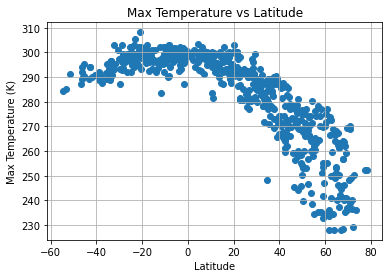

In [26]:
# Scatter plot of max temp vs latitude for weather data after filtering out cities with humidity >100
x_lat=weather_data_df_one['Latitude']
y_maxtemp=weather_data_df_one['Max Temp']

plt.scatter(x_lat, y_maxtemp)
plt.title("Max Temperature vs Latitude") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Temperature.png')

print(f' This sample shows as one moves closer to the equator the temperature increases.') 
print(f' This is because of less sunlight the further away one goes from the equator.')
#      Can you name all the countries on the equator?')

## Latitude vs. Humidity Plot

 This sample shows consistent humidity levels around the globe for most cities .
 There appear to be outliers. We could plot a boxplot to check for outliers.
 There world could not survive without humidity


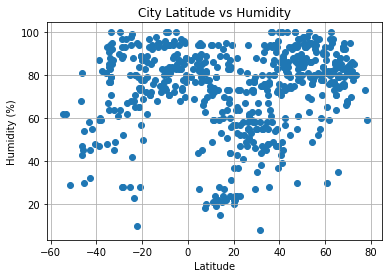

In [28]:
x_lat=weather_data_df_one['Latitude']
y_humidity=weather_data_df_one['Humidity']

plt.scatter(x_lat, y_humidity)
#plt.scatter(x_lat, y_maxtemp)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Humidity.png')

print(f' This sample shows consistent humidity levels around the globe for most cities .')
print(f' There appear to be outliers. We could plot a boxplot to check for outliers.')
print(f' There world could not survive without humidity')
# \'  is how you f string a '
# what might be perceived as outliers.')

## Latitude vs. Cloudiness Plot

 There was no correlation between city latitude and cloudiness in the sample of cities.


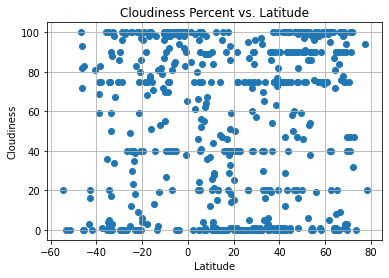

In [29]:
# Scatter plot of max temp vs latitude for weather data after filtering out cities with humidity >100
x_lat=weather_data_df_one['Latitude']
y_cloudiness=weather_data_df_one['Cloudiness']

plt.scatter(x_lat, y_cloudiness)
plt.title('Cloudiness Percent vs. Latitude') #how to use % and ' in f string???
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Cloudiness.png')

print(f' There was no correlation between city latitude and cloudiness in the sample of cities.') 


## Latitude vs. Wind Speed Plot

 This doesn't look like there is much correlation.
 The further you move toward each pole the more windy it appears to be.
 Latitude values are measured relative to the equator
 and range from -90° at the South Pole to +90° at the North Pole.


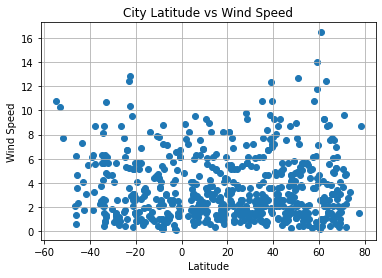

In [36]:
x_lat=weather_data_df_one['Latitude']
y_wind_speed=weather_data_df_one['Wind Speed']

plt.scatter(x_lat, y_wind_speed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

#print statement
plt.savefig('../WeatherPy/Latitude vs Wind Speed.png')

print(f' This doesn\'t look like there is much correlation.') 
print(f' The further you move toward each pole the more windy it appears to be.')
print(f' Latitude values are measured relative to the equator') 
print(f' and range from -90° at the South Pole to +90° at the North Pole.')



## Linear Regression

In [44]:
# latitude greater than 0 is northern
# latitude less than 0 is southern
# #print statement
# look in the read me file 

In [45]:
northern_hem_filter=weather_data_df_one.loc[:, "Latitude"]>=0 #on the equator included
northern_hem_df=weather_data_df_one.loc[northern_hem_filter,:]
northern_hem_df.describe()
# this is your northern_hemisphere_dataframe filter

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,37.790607,13.118231,276.300900,72.692500,51.560000,3.638200,1.612050e+09
std,20.134806,87.446438,19.093321,19.964202,39.587806,2.700884,1.403738e+02
min,1.166700,-179.166700,228.020000,8.000000,0.000000,0.230000,1.612050e+09
25%,20.513225,-68.777775,264.747500,60.000000,3.000000,1.540000,1.612050e+09
50%,38.197850,21.929800,279.940000,78.000000,56.500000,2.720000,1.612050e+09
75%,54.118325,83.949250,292.267500,87.000000,90.000000,5.140000,1.612050e+09
max,78.218600,179.316700,303.440000,100.000000,100.000000,16.460000,1.612050e+09


In [46]:
southern_hem_filter=weather_data_df_one.loc[:, "Latitude"]<0 #on the equator included
southern_hem_df=weather_data_df_one.loc[southern_hem_filter,:]
southern_hem_df.describe()
# this is your southern_hemisphere_dataframe filter

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,-20.850932,29.331656,296.387430,76.368715,58.871508,3.624302,1.612050e+09
std,13.233334,94.713014,4.435314,18.036116,38.304373,2.708019,1.523822e+02
min,-54.800000,-175.200000,283.560000,10.000000,0.000000,0.120000,1.612050e+09
25%,-32.375000,-54.358300,293.150000,68.000000,20.000000,1.375000,1.612050e+09
50%,-20.342800,28.698000,297.010000,80.000000,75.000000,2.840000,1.612050e+09
75%,-8.912200,121.326200,299.455000,89.000000,98.000000,5.530000,1.612050e+09
max,-0.600000,178.004200,308.150000,100.000000,100.000000,12.860000,1.612050e+09


In [47]:
len(southern_hem_df)
# this plus northern_hem_df should add up to your weather_data_df_one 

179

In [48]:
len(northern_hem_df)

400

In [49]:
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

# x_lat=weather_data_df_one['Latitude']
# y_wind_speed=weather_data_df_one['Wind Speed']

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
# regress_values = x_lat * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_lat,y_wind_speed)
# plt.plot(x_lat,regress_values,"r-")
# plt.annotate(line_eq,(0,5),fontsize=15,color="red")
# plt.xlabel('')
# plt.ylabel('')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()
# print(f' )

# #slope, intercept, rvalue, pvalue, stderr = linregress(x, y) #list unpacking 
# # y=mx+b #every straight line can be represented by this equation
# #regression=slope+x+intercept
# #regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')

# #liner regression is trying to draw a line as close as possible to the most dots


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7466213412756787


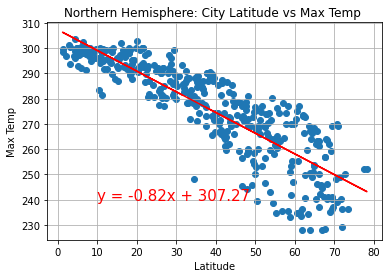

 This regression appears tight but as you move closer to the north pole
 the data is less correlated.


<Figure size 432x288 with 0 Axes>

In [51]:
x_lat=northern_hem_df['Latitude']
y_maxtemp=northern_hem_df['Max Temp']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_maxtemp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Max Temp ')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.xlim(0,90)
#plt.ylim(0,110)

plt.grid(True)
plt.show()
print(f' This regression appears tight but as you move closer to the north pole')
print(f' the data is less correlated.')
#=300-200
# based off this regression, we can expect the max temp 
plt.savefig('../WeatherPy/Northern_Latitude vs Max Temp.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2893311006019193


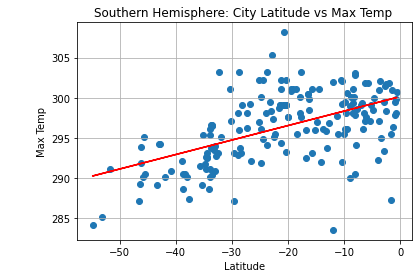

 City latitude appears less correlated than the Northern Hemisphere
 but this might be because the sample set are not equal. There is
 a little more than 2 times the samples in Northern vs Southern.


<Figure size 432x288 with 0 Axes>

In [52]:
x_lat=southern_hem_df['Latitude']
y_maxtemp=southern_hem_df['Max Temp']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_maxtemp)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-70,288),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Max Temp ')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.xlim(0,90)
#plt.ylim(0,110)

plt.grid(True)
plt.show()

print(f' City latitude appears less correlated than the Northern Hemisphere')
print(f' but this might be because the sample set are not equal. There is')
print(f' a little more than 2 times the samples in Northern vs Southern.')
#plt.savefig()
#find the line where you have the smallest distance between the point of the data set
plt.savefig('../WeatherPy/Southern_Latitude vs Max Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10445315980682346
 City latitude vs humidity shows there isn't a tight relationship


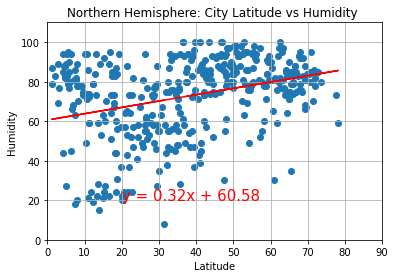

<Figure size 432x288 with 0 Axes>

In [53]:
x_lat=northern_hem_df['Latitude']
y_humidity=northern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_humidity)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
plt.xlim(0,90)
plt.ylim(0,110)
plt.grid(True)

print(f' City latitude vs humidity shows there isn\'t a tight relationship')
plt.show()

plt.savefig('../WeatherPy/Northern_Latitude vs Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 City latitude vs humidity in Southern Hempispher shows
 there isn't a strong correlation between the two.


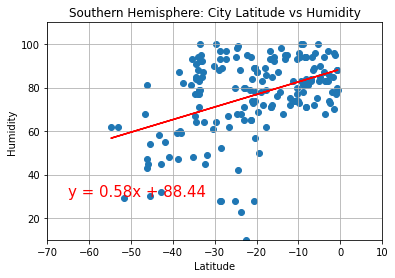

The r-squared is: 0.18029519276037584


In [54]:
x_lat=southern_hem_df['Latitude']
y_humidity=southern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_humidity)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-65,30),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#plot.xlim(min, max)
plt.xlim(-70,10)
plt.ylim(10,110)
plt.grid(True)
print(f' City latitude vs humidity in Southern Hempispher shows')
print(f' there isn\'t a strong correlation between the two.')
plt.show()

print(f"The r-squared is: {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07644413800294053
 There is not strong correlation between city latitude and cloudiness.
 I do not know why this plot would not show bigger.


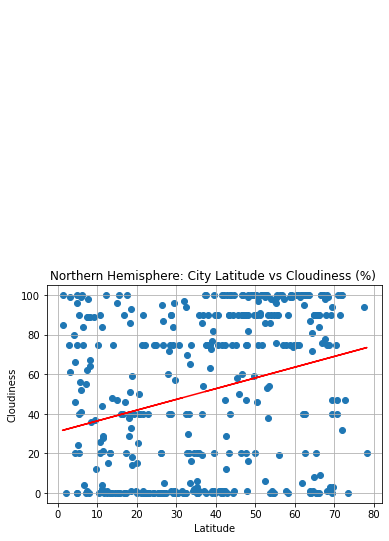

In [55]:
x_lat=northern_hem_df['Latitude']
y_cloudiness=northern_hem_df['Cloudiness']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloudiness)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Cloudiness (%) ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.grid(True)
print( f' There is not strong correlation between city latitude and cloudiness.')
print(f' I do not know why this plot would not show bigger.')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18029519276037584
 There appears to be more correlation in the Southern Hempisphere
 for city latitude compared to cloudiness.


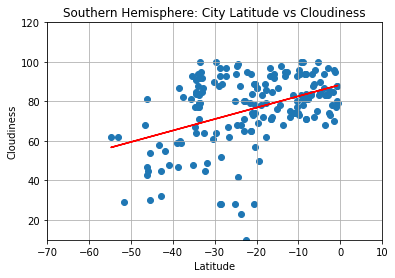

In [56]:
x_lat=southern_hem_df['Latitude']
y_cloudiness=southern_hem_df['Humidity']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_cloudiness)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-75,50),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
plt.xlim(-70,10)
plt.ylim(10,120)
plt.grid(True)
print(f' There appears to be more correlation in the Southern Hempisphere')
print(f' for city latitude compared to cloudiness.')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009570132607095526
 there doesn't appear to be strong correlation between city latitude vs wind speed.


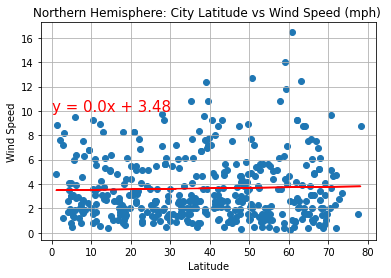

In [57]:
x_lat=northern_hem_df['Latitude']
y_wind_speed=northern_hem_df['Wind Speed']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wind_speed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title('Northern Hemisphere: City Latitude vs Wind Speed (mph) ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)

print(f' there doesn\'t appear to be strong correlation between city latitude vs wind speed.')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04368842247720583
 there doesn't appear to be strong correlation between city latitude vs wind speed.


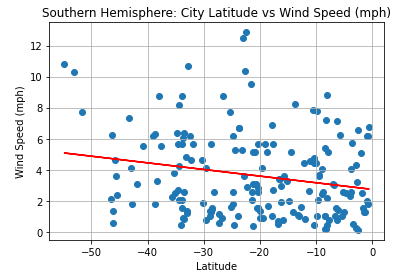

In [58]:
x_lat=southern_hem_df['Latitude']
y_wind_speed=southern_hem_df['Wind Speed']


# (slope, intercept, rvalue, pvalue,stderr)= linregress(x_lat, y_maxtemp)
# plt.scatter(x_lat, y_maxtemp)
# plt.title('City Latitude vs Max Temperature')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (K)')
# plt.grid(True)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_wind_speed)
regress_values = x_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat,y_wind_speed)
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-65,10),fontsize=15,color="red")
plt.title('Southern Hemisphere: City Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
#plot.xlim(min, max)
#plt.xlim(-70,10)
#plt.ylim(10,110)
plt.grid(True)
print(f' there doesn\'t appear to be strong correlation between city latitude vs wind speed.')
plt.show()